In [1]:
#Problem 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVR
warnings.filterwarnings('ignore')

In [2]:
def binary_map(x):
    return x.map({'yes':1, "no": 0})

In [3]:
df = pd.DataFrame(pd.read_csv('Housing.csv'))
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[varlist] = df[varlist].apply(binary_map)
del df['furnishingstatus']
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [4]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df))
y = df.pop(0)
x = df

In [5]:
#Part 1
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .8, test_size = .2)

cvr_rbf = SVR(kernel='rbf',C=1,gamma = .1).fit(x_train,y_train)
cvr_lin = SVR(kernel='linear',C=1).fit(x_train,y_train)
cvr_poly = SVR(kernel='poly',C=1,degree = 2).fit(x_train,y_train)

rbf = cvr_rbf.predict(x_test)
lin = cvr_lin.predict(x_test)
poly = cvr_poly.predict(x_test)

rbf_error = metrics.mean_squared_error(y_test, rbf)
lin_error = metrics.mean_squared_error(y_test, lin)
poly_error = metrics.mean_squared_error(y_test, poly)

print('RBF Error =', round(rbf_error,2),'Linear Error =', round(lin_error,2),'Polynomial Error =', round(poly_error,2))

RBF Error = 0.01 Linear Error = 0.01 Polynomial Error = 0.01


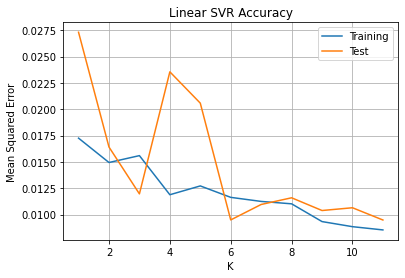

<Figure size 144x144 with 0 Axes>

Optimal K = 11
Training MSE =  0.01 Test MSE  = 0.01


In [6]:
#Part 3 Linear Model SVR
K = range(1,12)
accuracy = []
recall = []
precision = []
K_current = []
test_MSE = []
train_MSE = []

for k in K:
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)

    x_train, x_test, y_train, y_test = train_test_split(principalDf,y, train_size = .8, test_size = .2)

    clf = SVR(kernel='linear',C=1).fit(x_train,y_train)
    
    test_predicted = clf.predict(x_test)
    train_predicted = clf.predict(x_train)
    
    K_current.append(k)
    train_MSE.append(metrics.mean_squared_error(y_train, train_predicted))
    test_MSE.append(metrics.mean_squared_error(y_test, test_predicted))
    
plt.plot(K_current, train_MSE, label="Training")
plt.plot(K_current, test_MSE, label="Test")
plt.title('Linear SVR Accuracy')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.figure(figsize=(2, 2))
plt.show()

max_K = test_MSE.index(min(test_MSE))
print('Optimal K =', max_K+1)
print('Training MSE = ', round(train_MSE[max_K],2), 'Test MSE  =', round(test_MSE[max_K],2))

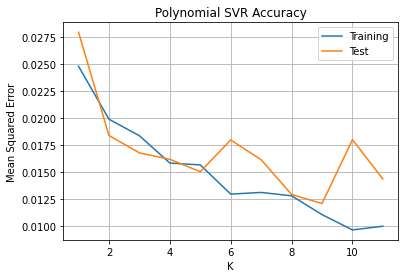

<Figure size 144x144 with 0 Axes>

Optimal K = 9
Training MSE =  0.01 Test MSE  = 0.01


In [7]:
#Part 4 Polynomial Model SVR
K = range(1,12)
accuracy = []
recall = []
precision = []
K_current = []
test_MSE = []
train_MSE = []

for k in K:
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)

    x_train, x_test, y_train, y_test = train_test_split(principalDf,y, train_size = .8, test_size = .2)

    clf = SVR(kernel='poly',C=1,degree = 2).fit(x_train,y_train)
    
    test_predicted = clf.predict(x_test)
    train_predicted = clf.predict(x_train)
    
    K_current.append(k)
    train_MSE.append(metrics.mean_squared_error(y_train, train_predicted))
    test_MSE.append(metrics.mean_squared_error(y_test, test_predicted))
    
plt.plot(K_current, train_MSE, label="Training")
plt.plot(K_current, test_MSE, label="Test")
plt.title('Polynomial SVR Accuracy')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.figure(figsize=(2, 2))
plt.show()

max_K = test_MSE.index(min(test_MSE))
print('Optimal K =', max_K+1)
print('Training MSE = ', round(train_MSE[max_K],2), 'Test MSE  =', round(test_MSE[max_K],2))

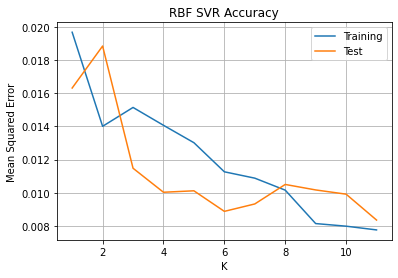

<Figure size 144x144 with 0 Axes>

Optimal K = 11
Training MSE =  0.01 Test MSE  = 0.01


In [8]:
#Part 4 RBF Model SVR
K = range(1,12)
accuracy = []
recall = []
precision = []
K_current = []
test_MSE = []
train_MSE = []

for k in K:
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)

    x_train, x_test, y_train, y_test = train_test_split(principalDf,y, train_size = .8, test_size = .2)

    clf = SVR(kernel='rbf',C=1,gamma = .1).fit(x_train,y_train)
    
    test_predicted = clf.predict(x_test)
    train_predicted = clf.predict(x_train)
    
    K_current.append(k)
    train_MSE.append(metrics.mean_squared_error(y_train, train_predicted))
    test_MSE.append(metrics.mean_squared_error(y_test, test_predicted))
    
plt.plot(K_current, train_MSE, label="Training")
plt.plot(K_current, test_MSE, label="Test")
plt.title('RBF SVR Accuracy')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.figure(figsize=(2, 2))
plt.show()

max_K = test_MSE.index(min(test_MSE))
print('Optimal K =', max_K+1)
print('Training MSE = ', round(train_MSE[max_K],2), 'Test MSE  =', round(test_MSE[max_K],2))

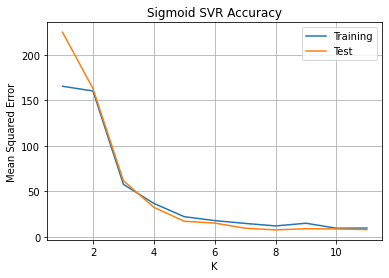

<Figure size 144x144 with 0 Axes>

Optimal K = 8
Training MSE =  12.15 Test MSE  = 7.75


In [9]:
#Part 4 Sigmoid Model SVR, Least test MSE value for K
K = range(1,12)
accuracy = []
recall = []
precision = []
K_current = []
test_MSE = []
train_MSE = []

for k in K:
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)

    x_train, x_test, y_train, y_test = train_test_split(principalDf,y, train_size = .8, test_size = .2)

    clf = SVR(kernel='sigmoid',C=1).fit(x_train,y_train)
    
    test_predicted = clf.predict(x_test)
    train_predicted = clf.predict(x_train)
    
    K_current.append(k)
    train_MSE.append(metrics.mean_squared_error(y_train, train_predicted))
    test_MSE.append(metrics.mean_squared_error(y_test, test_predicted))
    
plt.plot(K_current, train_MSE, label="Training")
plt.plot(K_current, test_MSE, label="Test")
plt.title('Sigmoid SVR Accuracy')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.figure(figsize=(2, 2))
plt.show()

max_K = test_MSE.index(min(test_MSE))
print('Optimal K =', max_K+1)
print('Training MSE = ', round(train_MSE[max_K],2), 'Test MSE  =', round(test_MSE[max_K],2))